<a href="https://colab.research.google.com/github/JeromeVeix/cab-predictiveanlanysis/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt #displays graphs and plots
from scipy import stats, integrate
from sklearn import metrics #library that evaulates predictions
from sklearn.linear_model import LinearRegression #allows us to implement Linear regression
from sklearn.model_selection import train_test_split #splits the data into training and testing data groupings
%matplotlib inline

In [ ]:
taxi = pd.read_csv('taxi_fare.csv')
taxi

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2.75,1,75.00,24,6.300,105.300,0
1,1187,3.43,1,105.00,24,13.200,142.200,0
2,730,3.12,1,71.25,0,26.625,97.875,1
3,671,5.63,3,90.00,0,9.750,99.750,0
4,329,2.09,1,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617,8.42,1,150.00,47,5.800,202.800,0
209669,438,1.29,1,48.75,12,34.575,95.325,1
209670,571,2.82,1,63.75,0,6.000,69.750,0
209671,491,2.16,1,56.25,0,13.500,69.750,0


In [ ]:
taxi_summary = taxi.describe() #provides descriptive/summary statistics of dataframe
taxi_summary

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


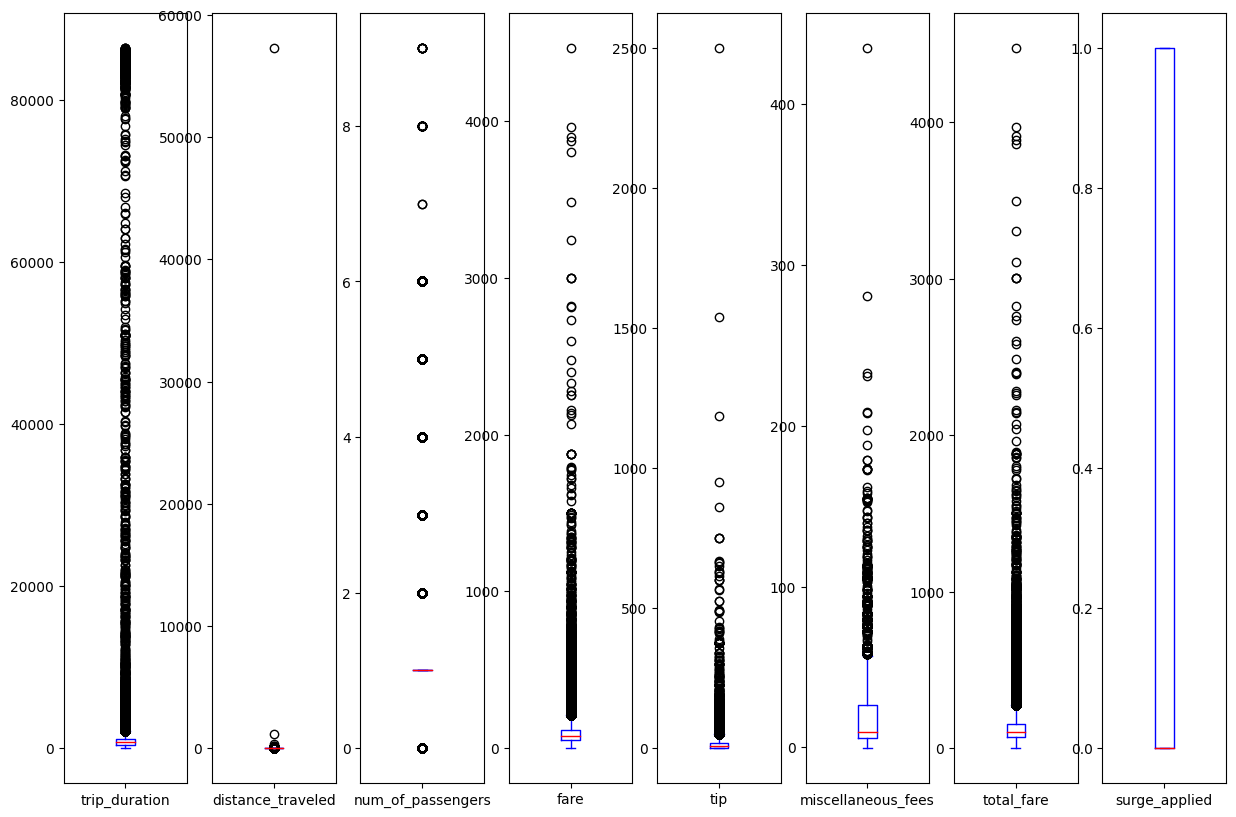

In [ ]:
boxplot = taxi.plot(kind='box', subplots=True, sharex=False, sharey=False, colormap='bwr', figsize=(15,10))
#plots a boxgraph of all  of the columns from the dataframe

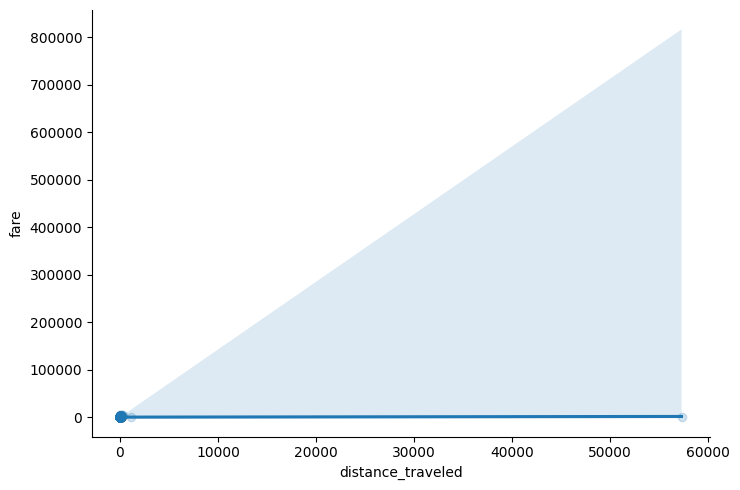

In [ ]:
#Scatterplot with best fit line to explore the relation between the distance traveled & fare
a = sns.lmplot(x='distance_traveled', y='fare', data=taxi, aspect=1.5, scatter_kws={'alpha':0.2})

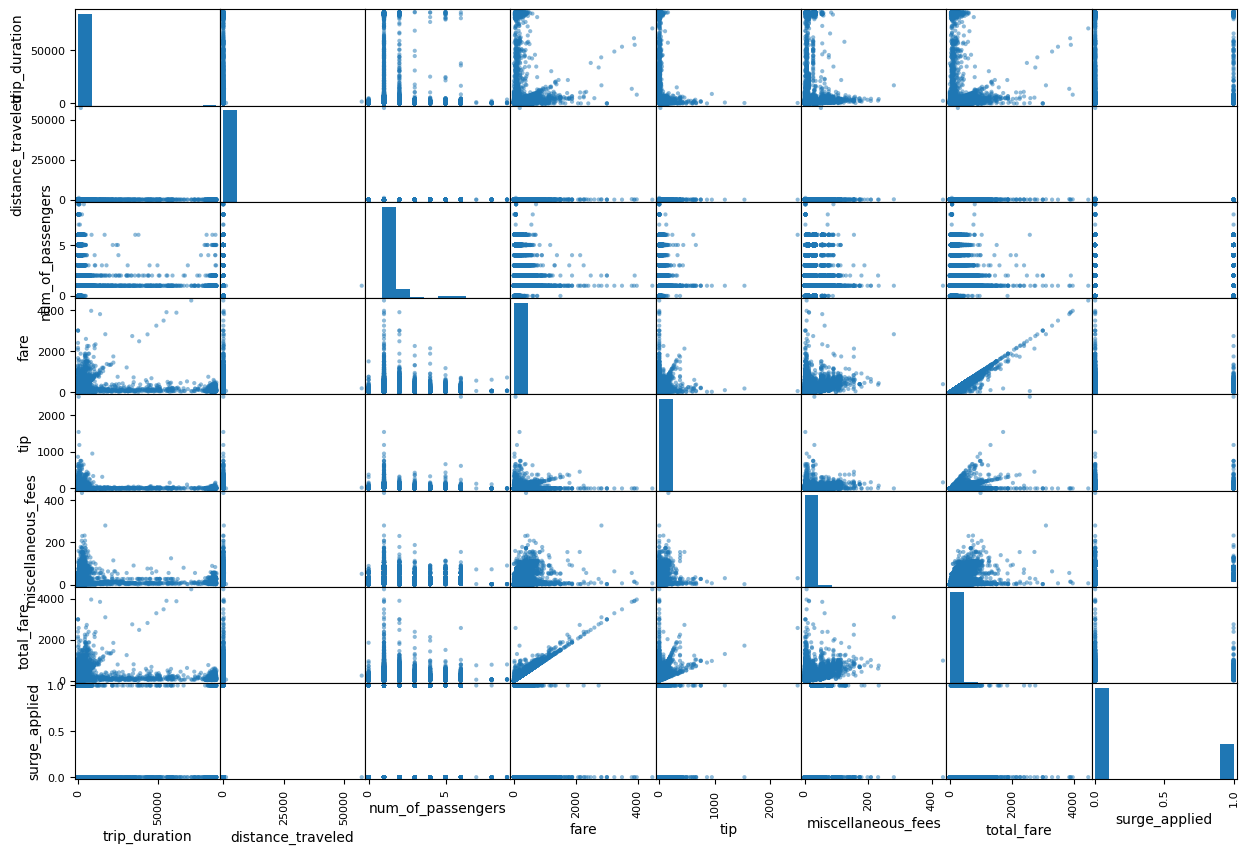

In [ ]:
#Combined scatterplot to explore the relation between all of the columns of the data
scatter=pd.plotting.scatter_matrix(taxi,figsize=(15,10))

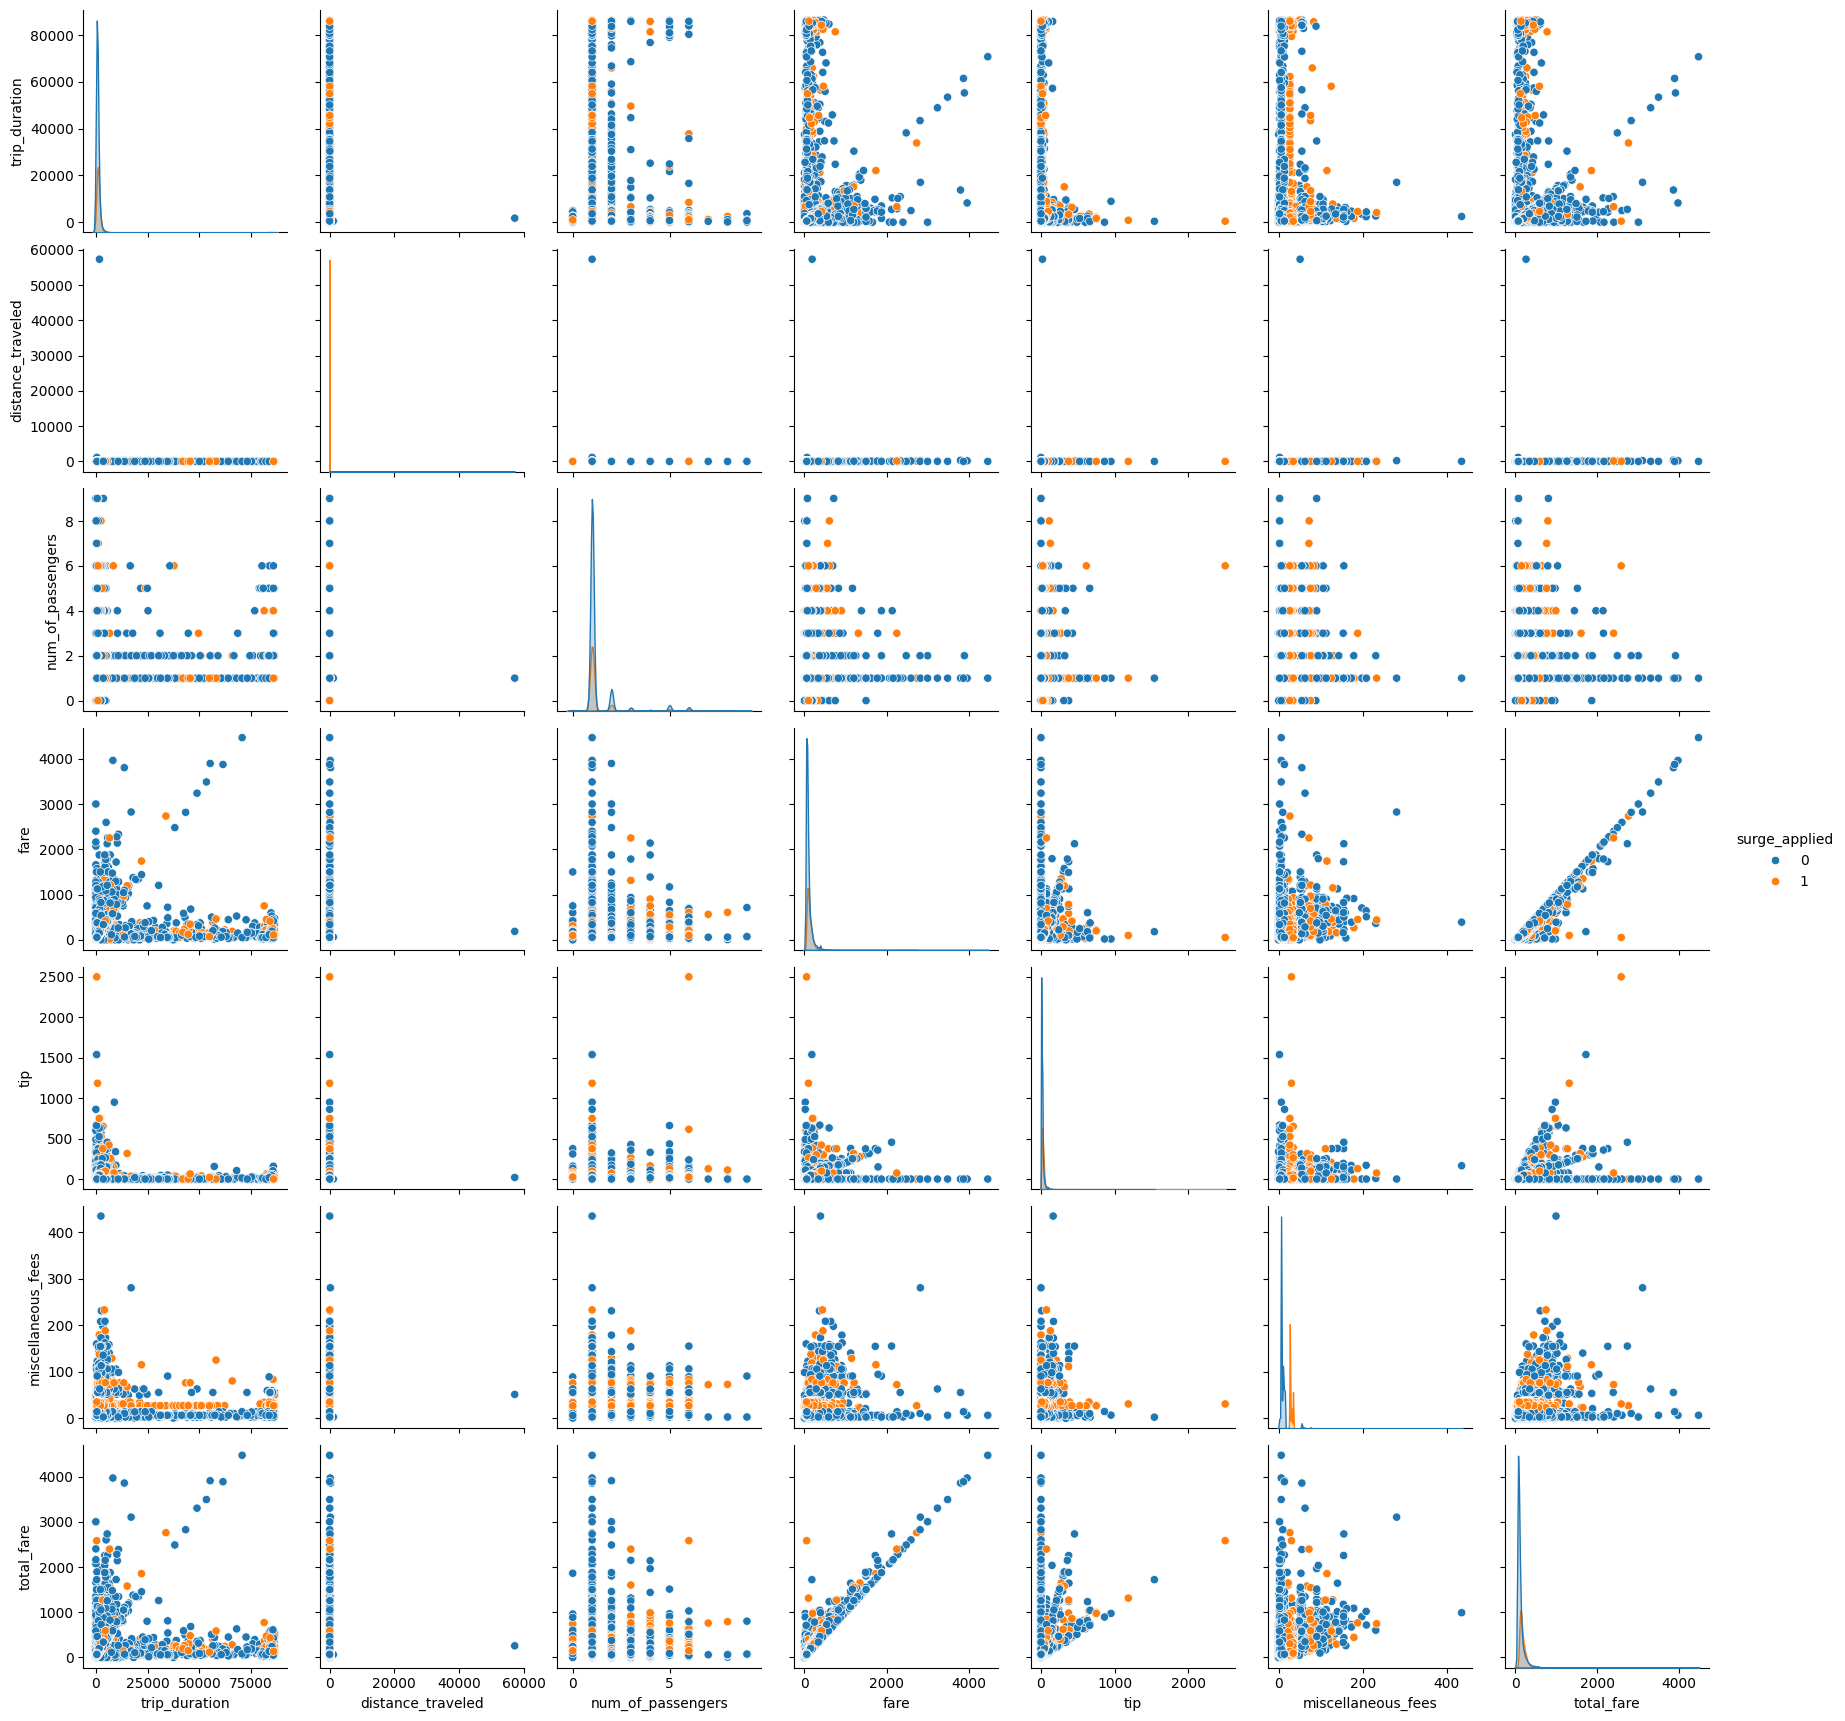

In [ ]:
#Scatterplot EDA between all columns (excluding 'surge_applied) and how 'surge_applied' are reacting to it
scatterplot = sns.pairplot(taxi, hue = 'surge_applied')

In [ ]:
#Identifying the relationship between fare and trip duration through the regression line
input_cols = ['fare'] #this is x-input
output_variable = ['trip_duration'] #This is the output y
X = taxi[input_cols]
Y = taxi[output_variable]
#Creating the Linear regression model
linreg = LinearRegression() #Bringing in the LR model
linreg.fit(X,Y) #Fitting the regression, best fitted line or the least squared line
print (linreg.intercept_) #intercept
print (linreg.coef_) #slope

[337.66573765]
[[8.38673925]]


In [ ]:
#The multilinear/multivariate regression model incorpates multiple x inputs
input_cols1 = ['tip', 'surge_applied', 'fare'] #this is x-input
output_variable1 = ['distance_traveled'] #This is the output y
X1 = taxi[input_cols1]
Y1 = taxi[output_variable1]
#Creating the Linear regression model
linreg1 = LinearRegression() #Bringing in the LR model
linreg1.fit(X1,Y1) #Fitting the regression, best fitted line or the least squared line
print (linreg1.intercept_) #intercept
print (linreg1.coef_) #slope

[-0.27261272]
[[ 0.01819076 -0.07996727  0.05131761]]


In [ ]:
#Creating multicollinearity through determinant value
#returns a matrix of the evaluations of the strength of the relationahips within dataframe
corr = np.corrcoef(X1, rowvar=0) #X1 references the columns (fare, tip, surge_applied)
print(corr)
print('\n')

#finds determinant of matrix
print(np.linalg.det(corr))

[[1.         0.23933364 0.30204429]
 [0.23933364 1.         0.14668741]
 [0.30204429 0.14668741 1.        ]]


0.8511793368796557


There is no high correlation between the columns suggesting multicollinearity

Determinant value for tip, fare, and surge applied = .85

Determinant value for tip and surge applied = .94

Determinant value for fare and surge applied = .97

Determinant for fare and tip = .90

In [ ]:
input = ['fare', 'tip', 'surge_applied'] #the same input columns from the last action
output = ['distance_traveled'] #the same output from the last action
x = taxi[input]
y = taxi[output]
y = taxi['distance_traveled']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)
#splitting up the data to form predictions and improve their performances

In [ ]:
#shape details the dimensions of the array
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(146771, 3)
(146771,)
(62902, 3)
(62902,)


In [ ]:
#Building the Linear model with the algorithm
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)

In [ ]:
#Coefficient of determination or R squared value

print('R-squared for training dataset model: ', model.score(x_train,y_train))

print('R-squared for testing dataset model: ', model.score(x_test,y_test))


R-squared for training dataset model:  0.5248068441763375
R-squared for testing dataset model:  0.00048690905174231247


In [ ]:
#input columns are still the same
print(model.intercept_) #intercept
print(model.coef_) #slope

-0.3609347147889723
[0.04876431 0.01356859 0.40229022]


In [ ]:
#Predicting the x_test with the model
predicted = model.predict(x_test)

In [ ]:
#the magnitude of difference between the prediction of an observation and the true results
print('MAE: ', metrics.mean_absolute_error(y_test, predicted))

#measures the amount of error in a statistical model
print('MSE: ', metrics.mean_squared_error(y_test, predicted))

#measures the average difference between values predicted by a model
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE:  2.0720579409903723
MSE:  52159.55676081581
RMSE:  228.38466840139642


In [ ]:
#R squared value or coeffecient of determination
print(metrics.r2_score(y_test, predicted)) #explains the variability by the regression model
#The higher the R square score, the better it is

0.00048690905174231247
